In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [3]:
# Load the dataset
data = pd.read_csv('Final_Fashion_Dataset.csv')

# Display the first few rows of the dataset
print(data.head())

   user_id     id  gender masterCategory subCategory articleType baseColour  \
0    93810   8493   Women        Apparel  Bottomwear      Skirts      Black   
1    24592  30757     Men        Apparel     Topwear      Kurtas       Grey   
2    13278  14881   Women    Accessories        Bags    Handbags      Black   
3    46048  48449     Men        Apparel     Topwear     Tshirts       Blue   
4    42098   4697  Unisex    Accessories     Watches     Watches      Black   

   season    year   usage                                 productDisplayName  \
0    Fall  2011.0  Casual                     Forever New Women Black Skirts   
1  Summer  2012.0  Ethnic                 Fabindia Men Grey Mangalgiri Kurta   
2  Summer  2011.0  Casual  United Colors of Benetton Women Solid Black Ha...   
3  Summer  2012.0  Casual                 French Connection Men Blue T-shirt   
4  Winter  2016.0  Sports           ADIDAS Unisex Digital Duramo Black Watch   

    filename                                

In [4]:
# Create a user-item matrix
user_item_matrix = data.pivot_table(index='user_id', columns='id', values='ratings', fill_value=0)

# Display the user-item matrix
print(user_item_matrix.head())

id       1163   1164   1165   1525   1526   1528   1529   1530   1531   1532   \
user_id                                                                         
10022      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10053      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10074      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10088      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10089      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

id       ...  59939  59940  59941  59942  59943  59944  59945  59998  59999  \
user_id  ...                                                                  
10022    ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10053    ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10074    ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10088    ...    0.0    0.0    0.0    

In [5]:
# Calculate cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)

# Convert to DataFrame for easier handling
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Display the similarity matrix
print(user_similarity_df.head())

user_id  10022  10053  10074  10088  10089  10142  10150  10167  10191  10205  \
user_id                                                                         
10022      1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10053      0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10074      0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10088      0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
10089      0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   

user_id  ...  99881  99889  99922  99925  99928  99952  99957  99974  99989  \
user_id  ...                                                                  
10022    ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10053    ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10074    ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10088    ...    0.0    0.0    0.0    

In [9]:
def get_recommendations(user_id, user_item_matrix, user_similarity_df, n_recommendations=5):
    # Get the user's ratings
    if user_id not in user_item_matrix.index or user_id not in user_similarity_df.index:
        print(f"User ID {user_id} not found in the dataset.")
        return []
    # Rest of your code...
    user_ratings = user_item_matrix.loc[user_id]

    # Get similar users
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)

    # Get the ratings of similar users
    similar_users_ratings = user_item_matrix.loc[similar_users.index]

    # Calculate weighted ratings
    weighted_ratings = similar_users_ratings.T.dot(similar_users)

    # Normalize the weighted ratings
    weighted_ratings = weighted_ratings / similar_users.sum()

    # Remove items already rated by the user
    weighted_ratings = weighted_ratings[~user_ratings.index.isin(user_ratings[user_ratings > 0].index)]

    # Get the top N recommendations
    recommendations = weighted_ratings.nlargest(n_recommendations)

    return recommendations.index.tolist()

# Example usage
user_id = 93810  # Replace with the user ID you want to get recommendations for
recommendations = get_recommendations(user_id, user_item_matrix, user_similarity_df, n_recommendations=5)
print(f"Top recommendations for user {user_id}: {recommendations}")

Top recommendations for user 93810: [1163, 1164, 1165, 1525, 1526]


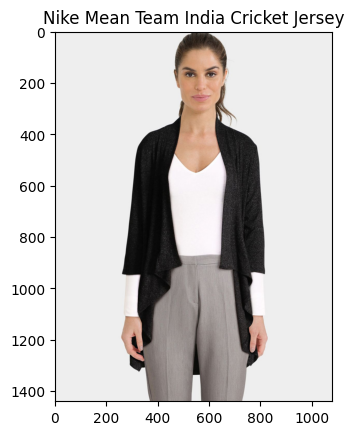

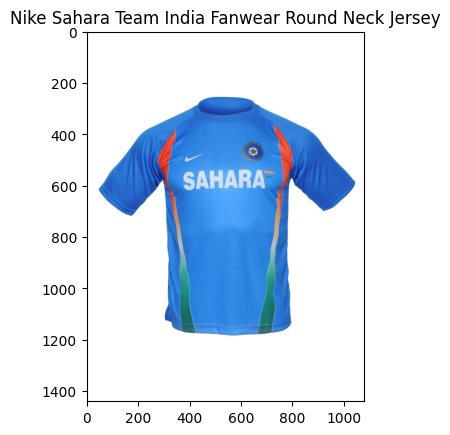

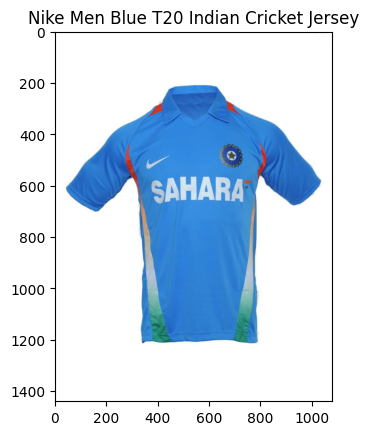

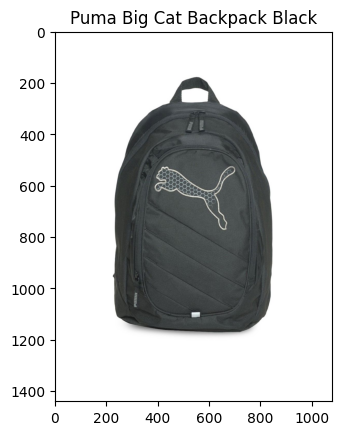

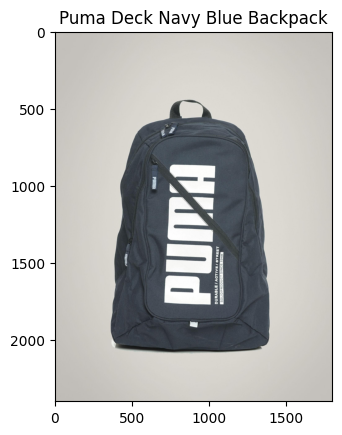

In [11]:
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

def display_recommended_images(recommendations, data):
    # Fetch product details for the recommended item IDs
    recommended_items = data[data['id'].isin(recommendations)]

    # Display the recommended products with images
    for index, row in recommended_items.iterrows():
        image_url = row['link']
        response = requests.get(image_url)
        img = Image.open(BytesIO(response.content))
        plt.imshow(img)
        plt.title(row['productDisplayName'])
        plt.show()

# Example usage
user_id = 93810  # Replace with the user ID you want to get recommendations for
recommendations = get_recommendations(user_id, user_item_matrix, user_similarity_df, n_recommendations=5)
display_recommended_images(recommendations, data)